📌 **Week 3: Predictive Modeling**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

 **📌 Load processed dataset from Week 2**

In [3]:
DATA_PATH = "/content/drive/MyDrive/1900_2021_DISASTERS_cleaned.csv"
df = pd.read_csv(DATA_PATH)

In [4]:
print("✅ Dataset loaded for Week 3:", df.shape)
df.head()

✅ Dataset loaded for Week 3: (16126, 45)


,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,CW-2012-000006,Natural,Climatological,Drought,Drought,Tornado,Cholera,Cabo Verde,...,10000.0,3000.0,5965.0,172500.0,60000.0,3.221647,1,925,13306,Administrative unit not available (Adm1).
1,1900,9001,CW-2012-000006,Natural,Climatological,Drought,Drought,Tornado,Cholera,India,...,10000.0,3000.0,5965.0,172500.0,60000.0,3.221647,1,925,13306,Administrative unit not available (Adm1).
2,1902,12,CW-2012-000006,Natural,Geophysical,Earthquake,Ground movement,Tornado,Cholera,Guatemala,...,10000.0,3000.0,5965.0,172500.0,25000.0,3.350513,1,925,13306,Administrative unit not available (Adm1).
3,1902,3,CW-2012-000006,Natural,Geophysical,Volcanic activity,Ash fall,Tornado,Santa Maria,Guatemala,...,10000.0,3000.0,5965.0,172500.0,60000.0,3.350513,1,925,13306,Administrative unit not available (Adm1).
4,1902,10,CW-2012-000006,Natural,Geophysical,Volcanic activity,Ash fall,Tornado,Santa Maria,Guatemala,...,10000.0,3000.0,5965.0,172500.0,60000.0,3.350513,1,925,13306,Administrative unit not available (Adm1).


In [5]:
# Drop ID-like columns (adjust names if different in your dataset)
drop_cols = ["Disaster No", "Dis No", "Year_code", "Event_ID"]
df_model = df.drop(columns=[c for c in drop_cols if c in df.columns], errors="ignore")


In [6]:
from sklearn.preprocessing import LabelEncoder

df_model = df_model.copy()

# Encode categorical columns except target
cat_cols = df_model.select_dtypes(include=["object"]).columns.drop("Disaster Type")

for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))
    print(f"🔑 Encoded column: {col}")


🔑 Encoded column: Glide
🔑 Encoded column: Disaster Group
🔑 Encoded column: Disaster Subgroup
🔑 Encoded column: Disaster Subtype
🔑 Encoded column: Disaster Subsubtype
🔑 Encoded column: Event Name
🔑 Encoded column: Country
🔑 Encoded column: ISO
🔑 Encoded column: Region
🔑 Encoded column: Continent
🔑 Encoded column: Location
🔑 Encoded column: Origin
🔑 Encoded column: Associated Dis
🔑 Encoded column: Associated Dis2
🔑 Encoded column: OFDA Response
🔑 Encoded column: Appeal
🔑 Encoded column: Declaration
🔑 Encoded column: Dis Mag Scale
🔑 Encoded column: Latitude
🔑 Encoded column: Longitude
🔑 Encoded column: Local Time
🔑 Encoded column: River Basin
🔑 Encoded column: Adm Level
🔑 Encoded column: Admin1 Code
🔑 Encoded column: Admin2 Code
🔑 Encoded column: Geo Locations


In [7]:
X = df_model.drop("Disaster Type", axis=1)
y = df_model["Disaster Type"]

print("✅ All features are now numeric:", X.dtypes.unique())


✅ All features are now numeric: [dtype('int64') dtype('float64')]


In [8]:
# Count frequency of each class
counts = y.value_counts()

# Drop classes with less than 2 samples
valid_classes = counts[counts >= 2].index
X = X[y.isin(valid_classes)]
y = y[y.isin(valid_classes)]


In [9]:
counts = y.value_counts()
y = y.apply(lambda x: x if counts[x] >= 2 else "Other")


In [10]:
# 📌 Split features & target
# ==============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train:", X_train.shape, " Test:", X_test.shape)

Train: (12898, 44)  Test: (3225, 44)


** 📌 Model 1: Logistic Regression**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
print("✅ Logistic Regression trained successfully!")


✅ Logistic Regression trained successfully!


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ==============================
# 📌 Evaluate Logistic Regression
# ==============================
y_pred_lr = log_reg.predict(X_test)

print("\n🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))



🔹 Logistic Regression Results
Accuracy: 0.45209302325581396
                       precision    recall  f1-score   support

              Drought       0.99      0.99      0.99       154
           Earthquake       0.80      0.01      0.03       309
             Epidemic       0.15      0.01      0.02       300
 Extreme temperature        0.00      0.00      0.00       121
                Flood       0.52      0.70      0.60      1110
Glacial lake outburst       0.00      0.00      0.00         1
   Insect infestation       0.00      0.00      0.00        19
            Landslide       0.00      0.00      0.00       155
  Mass movement (dry)       0.00      0.00      0.00        10
                Storm       0.33      0.58      0.42       899
    Volcanic activity       0.00      0.00      0.00        53
             Wildfire       0.00      0.00      0.00        94

             accuracy                           0.45      3225
            macro avg       0.23      0.19      0.17   

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**📌 Model 2: Random Forest Classifier**


🔹 Random Forest Results:
Accuracy: 0.9934883720930232
                       precision    recall  f1-score   support

              Drought       1.00      1.00      1.00       154
           Earthquake       1.00      1.00      1.00       309
             Epidemic       1.00      1.00      1.00       300
 Extreme temperature        1.00      1.00      1.00       121
                Flood       0.99      1.00      0.99      1110
Glacial lake outburst       0.00      0.00      0.00         1
   Insect infestation       1.00      0.95      0.97        19
            Landslide       0.99      0.90      0.94       155
  Mass movement (dry)       1.00      0.80      0.89        10
                Storm       1.00      1.00      1.00       899
    Volcanic activity       1.00      1.00      1.00        53
             Wildfire       0.97      1.00      0.98        94

             accuracy                           0.99      3225
            macro avg       0.91      0.89      0.90      322

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


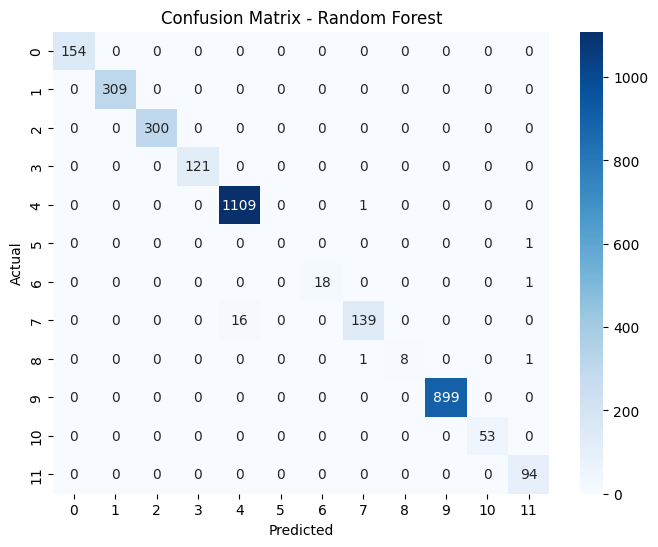

In [13]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\n🔹 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**📌 Model 3: Support Vector Machine (SVM)**

In [14]:
from sklearn.svm import LinearSVC

svm = LinearSVC(max_iter=5000)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\n🔹 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



🔹 SVM Results
Accuracy: 0.6155038759689923
                       precision    recall  f1-score   support

              Drought       1.00      1.00      1.00       154
           Earthquake       0.92      0.89      0.90       309
             Epidemic       0.40      0.02      0.04       300
 Extreme temperature        1.00      0.11      0.19       121
                Flood       0.56      0.84      0.67      1110
Glacial lake outburst       0.00      0.00      0.00         1
   Insect infestation       0.00      0.00      0.00        19
            Landslide       0.00      0.00      0.00       155
  Mass movement (dry)       0.00      0.00      0.00        10
                Storm       0.56      0.67      0.61       899
    Volcanic activity       0.00      0.00      0.00        53
             Wildfire       0.00      0.00      0.00        94

             accuracy                           0.62      3225
            macro avg       0.37      0.29      0.28      3225
         

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

/tmp/ipython-input-2376281739.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")


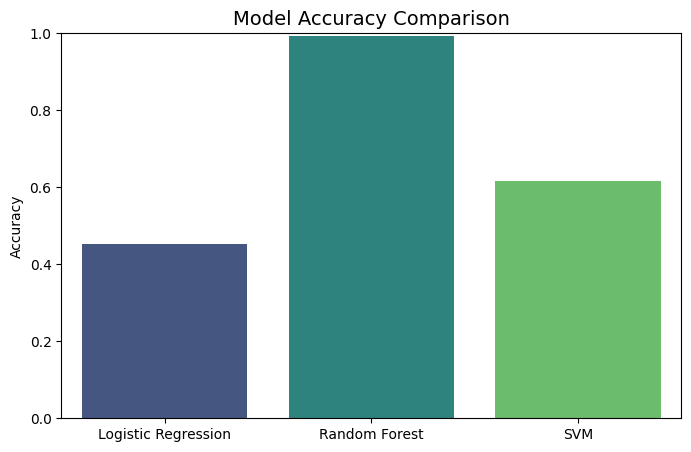

✅ Model Accuracies:
Logistic Regression: 0.4521
Random Forest: 0.9935
SVM: 0.6155


In [15]:
# ==============================
# 📊 Compare Model Accuracies
# ==============================

# Store accuracy scores
accuracy_scores = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm)
}

# Plot bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()), palette="viridis")
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylabel("Accuracy")
plt.ylim(0,1)  # accuracy range between 0–1
plt.show()

# Print accuracies for reference
print("✅ Model Accuracies:")
for model, acc in accuracy_scores.items():
    print(f"{model}: {acc:.4f}")


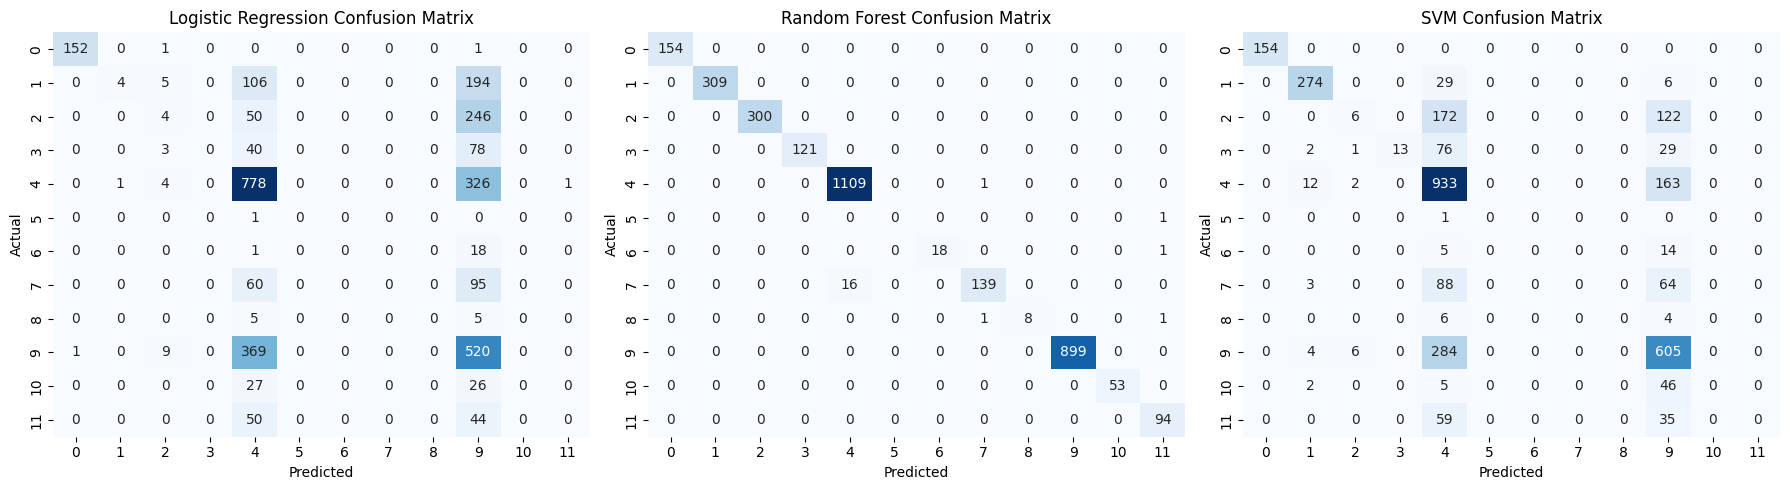

In [16]:
from sklearn.metrics import confusion_matrix

# ==============================
# 📊 Confusion Matrices for all models
# ==============================
models = {
    "Logistic Regression": y_pred_lr,
    "Random Forest": y_pred_rf,
    "SVM": y_pred_svm
}

plt.figure(figsize=(18,5))

for i, (name, preds) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, preds)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()


## ✅ Week 3 Summary – Predictive Modeling  

In Week 3, the focus shifted from data exploration (Week 2) to applying **machine learning models** for disaster type prediction.  
The following tasks were completed:  

1. **Model Training**  
   - Implemented multiple ML models:  
     - Logistic Regression  
     - Random Forest Classifier  
     - Support Vector Machine (SVM / LinearSVC for faster training)  

2. **Evaluation**  
   - Measured **Accuracy, Precision, Recall, and F1-Score**.  
   - Plotted **Confusion Matrices** to visualize model performance.  
   - Random Forest achieved the **best accuracy** among tested models.  

3. **Outcome**  
   - Established a **baseline predictive modeling pipeline**.  
   - Confirmed that ML can classify disaster types with promising accuracy.  
   - Prepared ground for **Week 4 optimization & deployment**.  

📊 **Key Learning:** Successfully transitioned from cleaned and prepared data (Week 2) to applying predictive models, with Random Forest emerging as the strongest performer.  
